In [4]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline

In [5]:
df = pd.read_csv('C:/Users/wzxwa/Desktop/BikeShare.csv').set_index('Instant')

In [6]:
print(df.shape)
df.head()

(17379, 11)


,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
Instant,,,,,,,,,,,
1,16,1,1,0,0,6,0,1,37,0.81,0.0
2,40,1,1,1,0,6,0,1,36,0.80,0.0
3,32,1,1,2,0,6,0,1,36,0.80,0.0
4,13,1,1,3,0,6,0,1,37,0.75,0.0
5,1,1,1,4,0,6,0,1,37,0.75,0.0


In [7]:
df.tail()

,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
Instant,,,,,,,,,,,
17375,119,1,12,19,0,1,1,2,34,0.60,0.1642
17376,89,1,12,20,0,1,1,2,34,0.60,0.1642
17377,90,1,12,21,0,1,1,1,34,0.60,0.1642
17378,61,1,12,22,0,1,1,1,36,0.56,0.1343
17379,49,1,12,23,0,1,1,1,36,0.65,0.1343


In [8]:
len(df)/24

724.125

# Determine the time period
At first glance, each row represents a hourly record. The whole dataset seems to be continuous for about 724 days (2 years and most likely a peried of two calendar years). The exact dates are not provided, but could be inferred from Month and Weekday. Take a look at January and we can find there are only 29 days in the first year. By examining Weekday, the two missing days could be pinned: a Tuesday between `16` and `17`, and a Thursday between `24` and `25`. Then we can confirm the first line the dataset begins at Jan 1 of that year and it's a Saturday. Searching from the calendar, we found the most recent eligible year is 2011. Because 2012 is a leap year, we can easily check the number of days in Feb to confirm our assumption. Now we are pretty sure the dataset is a record of 2011 and 2012.

In [9]:
df[(df.Month == 1) & (df.Hour == 0)].reset_index()

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
0,1,16,1,1,0,0,6,0,1,37,0.81,0.0000
1,25,17,1,1,0,0,0,0,2,57,0.88,0.2985
2,48,5,1,1,0,0,1,1,1,27,0.44,0.3582
3,70,5,1,1,0,0,2,1,1,25,0.55,0.1045
4,93,6,1,1,0,0,3,1,1,34,0.64,0.0000
5,116,11,1,1,0,0,4,1,1,32,0.55,0.0000
6,139,17,1,1,0,0,5,1,2,27,0.64,0.1940
7,162,25,1,1,0,0,6,0,2,27,0.51,0.1642
8,186,25,1,1,0,0,0,0,1,12,0.42,0.3881
9,210,5,1,1,0,0,1,1,1,18,0.50,0.2836


In [10]:
df[(df.Month == 2) & (df.Hour == 0)].reset_index()

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
0,689,8,1,2,0,0,2,1,2,25,0.64,0.1045
1,712,2,1,2,0,0,3,1,3,32,0.93,0.1045
2,736,12,1,2,0,0,4,1,1,23,0.40,0.4478
3,759,13,1,2,0,0,5,1,2,34,0.44,0.0000
4,782,39,1,2,0,0,6,0,2,32,0.70,0.1642
5,806,39,1,2,0,0,0,0,1,34,0.70,0.1940
6,830,15,1,2,0,0,1,1,1,37,0.65,0.0000
7,854,10,1,2,0,0,2,1,2,41,0.87,0.0000
8,878,17,1,2,0,0,3,1,1,12,0.36,0.3582
9,901,16,1,2,0,0,4,1,3,19,0.86,0.1940


In [11]:
df.index[(df.Month==12)&(df.Hour==23)]

Int64Index([ 7928,  7952,  7976,  8000,  8024,  8048,  8072,  8096,  8120,
             8144,  8168,  8192,  8216,  8240,  8264,  8288,  8312,  8336,
             8360,  8384,  8408,  8432,  8456,  8480,  8503,  8526,  8550,
             8573,  8597,  8621,  8645, 16661, 16685, 16709, 16733, 16757,
            16781, 16805, 16829, 16853, 16877, 16901, 16925, 16949, 16973,
            16997, 17021, 17045, 17069, 17093, 17117, 17141, 17165, 17189,
            17212, 17235, 17259, 17283, 17307, 17331, 17355, 17379],
           dtype='int64', name='Instant')

Now we can create a new feature `Year` for our dataset.

In [12]:
df.loc[8644:8647]

,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
Instant,,,,,,,,,,,
8644,38,1,12,22,0,6,0,1,50,0.62,0.1343
8645,31,1,12,23,0,6,0,1,48,0.66,0.0000
8646,48,1,1,0,0,0,0,1,48,0.66,0.0000
8647,93,1,1,1,0,0,0,1,45,0.66,0.1343


In [13]:
(df.index > 8645)

array([False, False, False, ...,  True,  True,  True])

In [14]:
df['Year'] = (df.index > 8645) + 2011

# Impute date
Next, we can further impute the date for each row. This is not simple and direct, especially there are several missing days. 

In [15]:
start = datetime(2011, 1, 1)
end = datetime(2012, 12, 31)
date_range = pd.date_range(start, end)
date = pd.DataFrame(date_range, columns=['date'])
date['Weekday'] = (date.date.dt.weekday + 1).replace(7, 0)
date['Year'] = date.date.dt.year
date['Month'] = date.date.dt.month
date['Day'] = date.date.dt.day
date.head()

,date,Weekday,Year,Month,Day
0,2011-01-01,6,2011,1,1
1,2011-01-02,0,2011,1,2
2,2011-01-03,1,2011,1,3
3,2011-01-04,2,2011,1,4
4,2011-01-05,3,2011,1,5


In [16]:
df_date = []
on_cols = ['Year', 'Month', 'Weekday']

j = 0
last = tuple(df[on_cols].loc[1])
for i in df.index:
    current = tuple(df[on_cols].loc[i])
    if current != last:
        last = current
        while current != tuple(date[on_cols].loc[j]):
            j += 1
    df_date.append(date.date.loc[j])

df['date'] = df_date

To double check our imputation is correct, we compare original feature `Weekday` with the weekday of our new feature `date`. Note:
- in our dataset `Weekday`: 0 is Sunday and 6 is Saturday
- in `pandas.Series.dt.weekday`: 0 is Monday and 6 is Sunday

In [17]:
matched = ((df.date.dt.weekday + 1).replace(7, 0) == df.Weekday).sum()
print('{}/{} rows matched.'.format(matched, len(df)))

17379/17379 rows matched.


In [18]:
df['Day'] = df.date.dt.day

# Pairplot
Now it's time to use pairplot to take a look at the relationships between features.

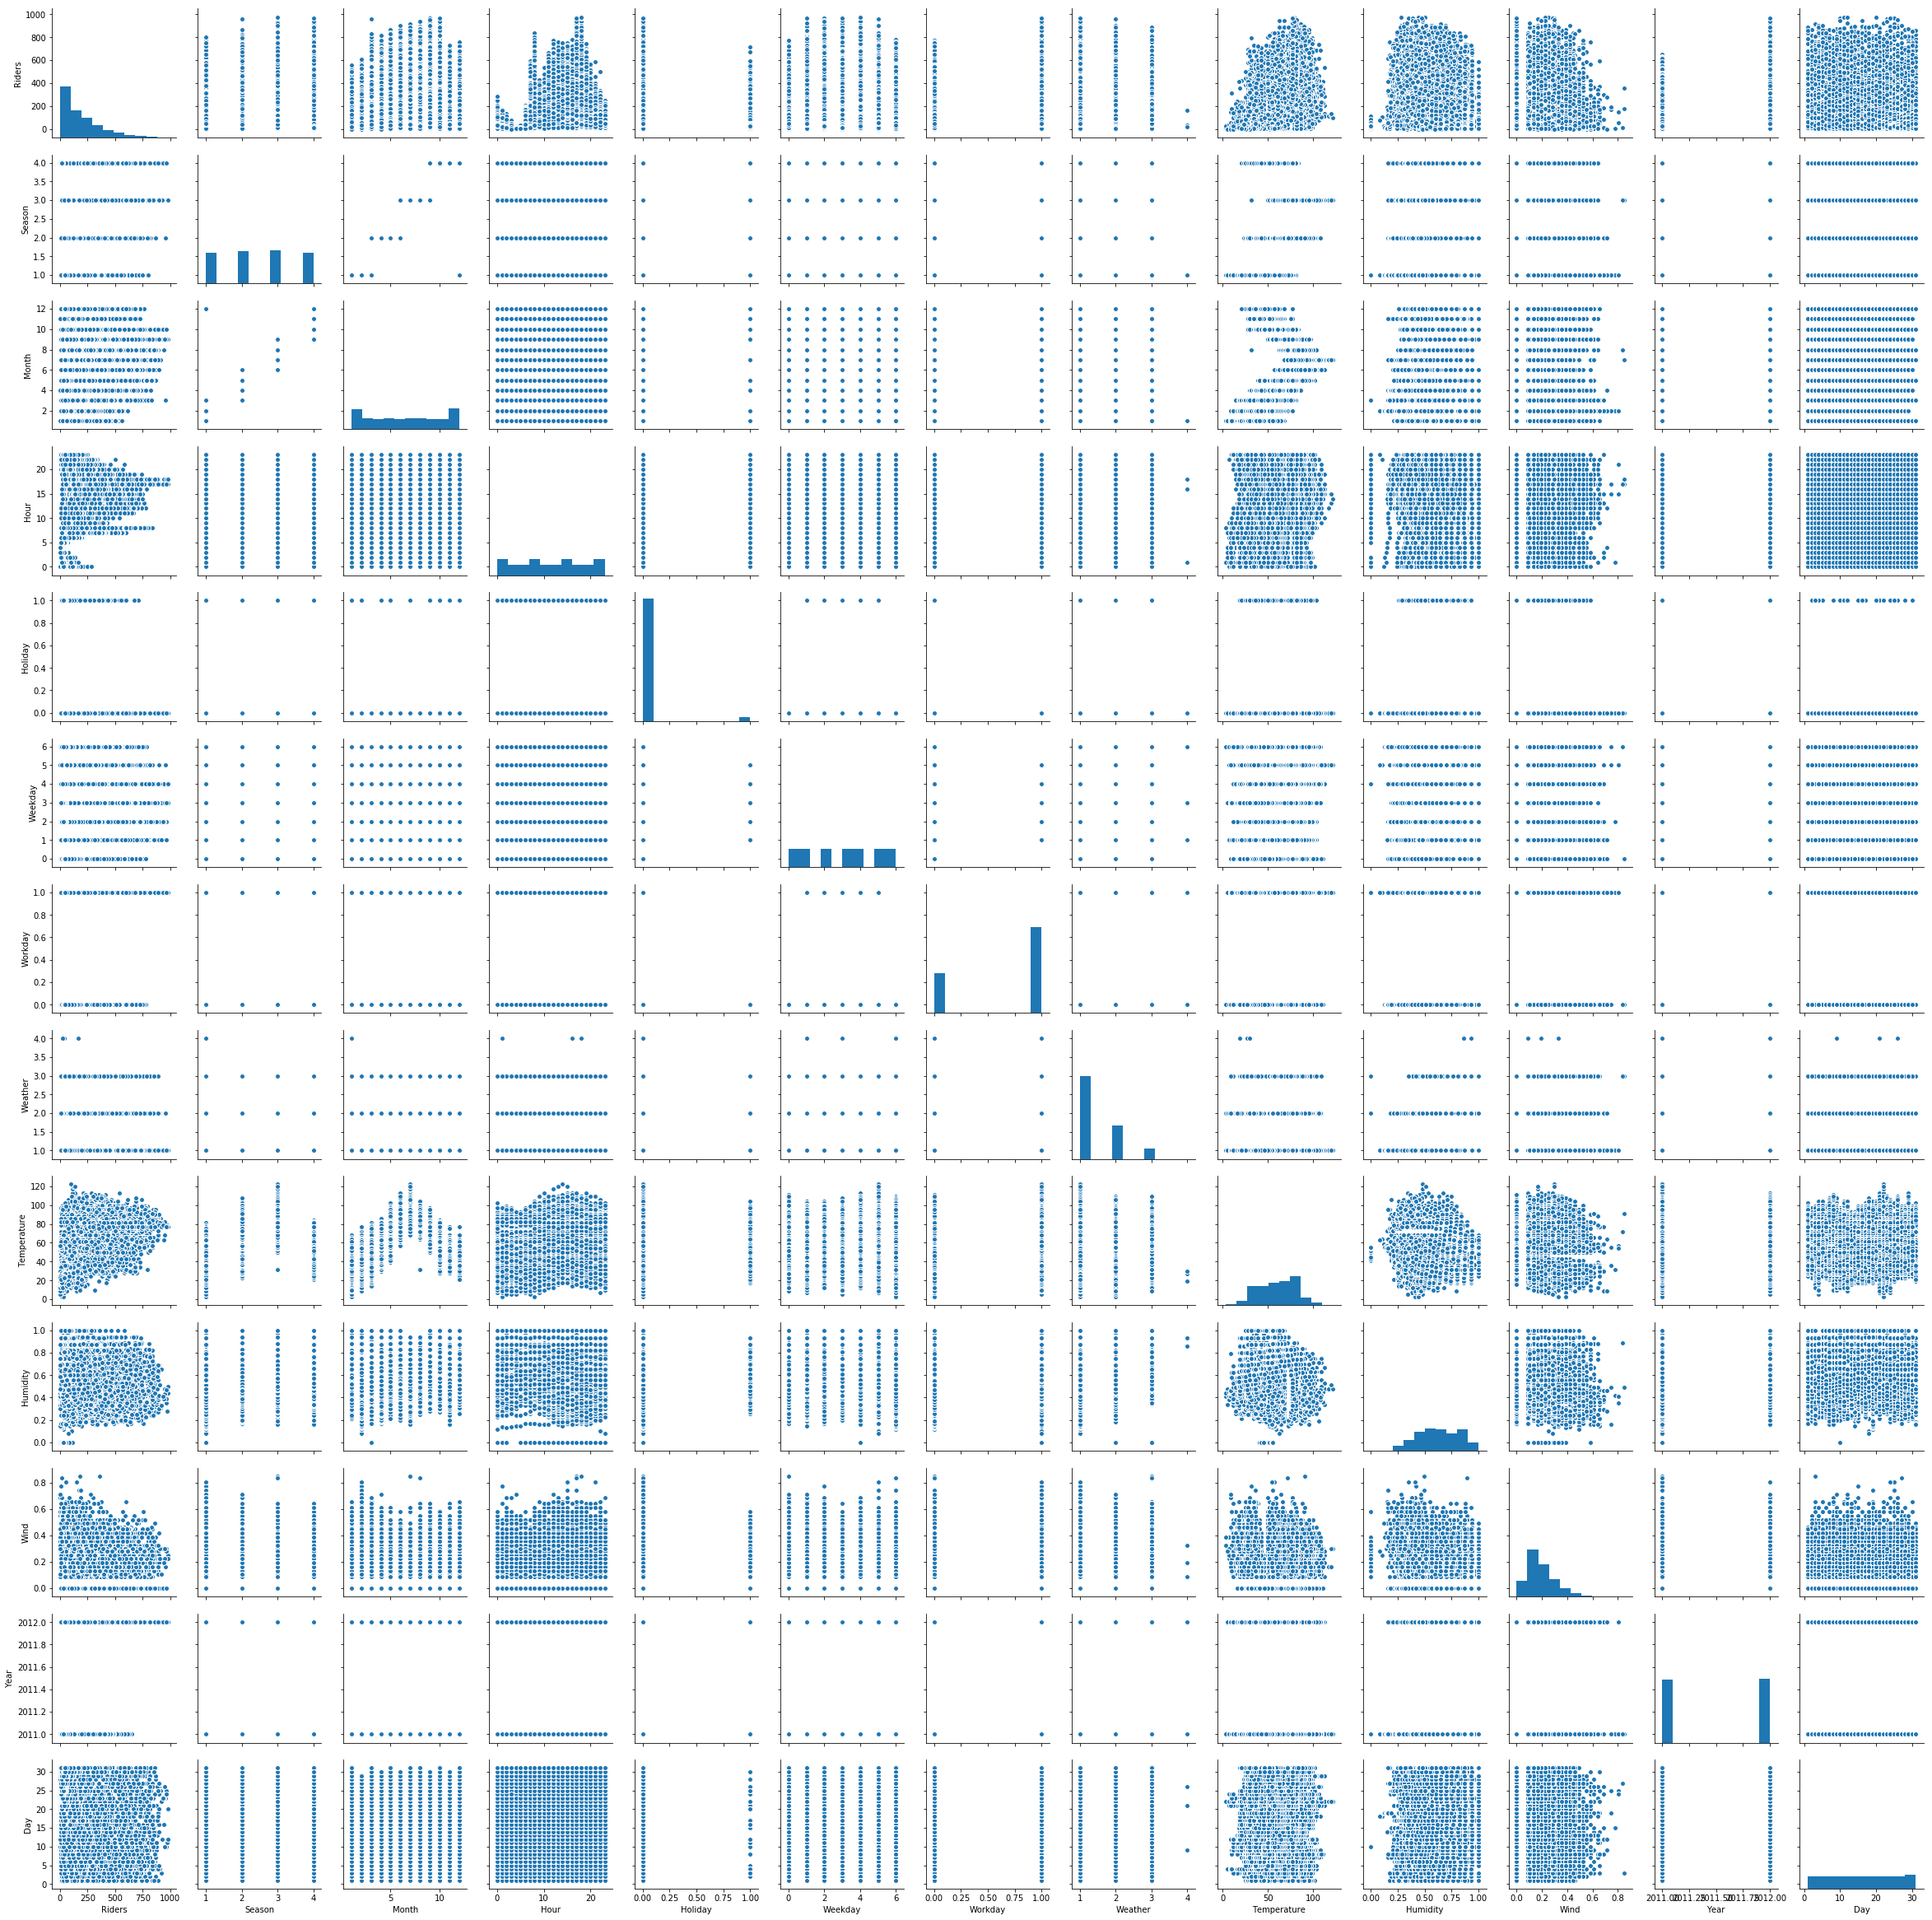

In [19]:
sns.pairplot(df);

# Findings
1. 2011-2012
2. Season(Winter,Spring,Summer,Fall)
3. One day in Aug. 2012 (14132:14155) Temperature == 32 outlier
4. One day in Mar. 2011 (1552:1573) Humidity == 0 outlier
5. days in Jul. 2011 and Apr. 2012 Wind outliers
6. Weather 4 is useless

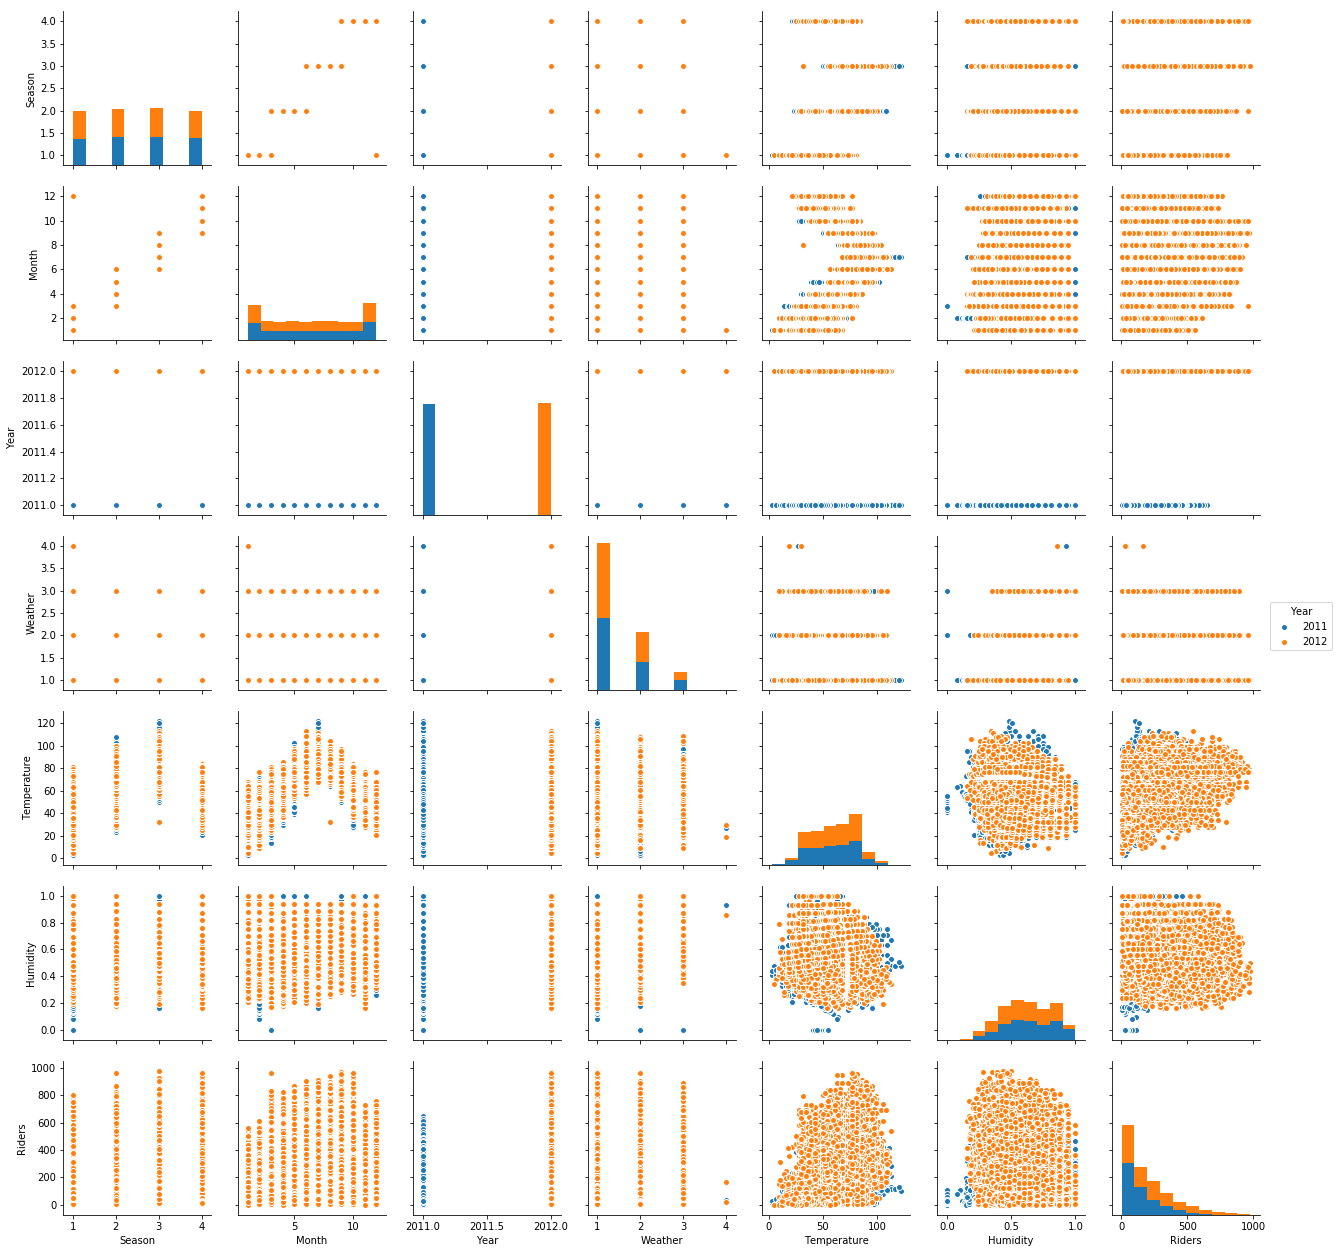

In [20]:
sns.pairplot(df[['Season', 'Month', "Year",'Weather', 'Temperature', 'Humidity','Riders']],hue="Year");

# TO DO:
1. Season cut point
2. Temperature outlier
3. Humidity outlier
4. Wind outlier
5. Weather 4

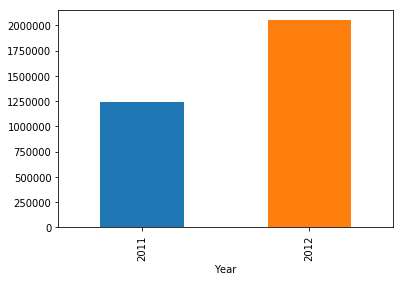

In [21]:
df.Riders.groupby(df.Year).sum().plot.bar()

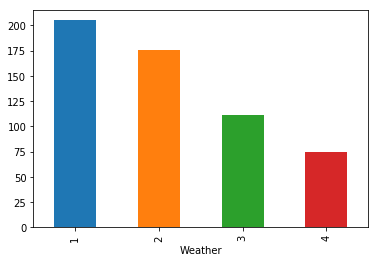

In [22]:
df.Riders.groupby(df.Weather).mean().plot.bar()

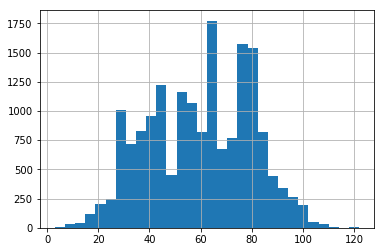

In [23]:
df.Temperature.hist(bins=30)

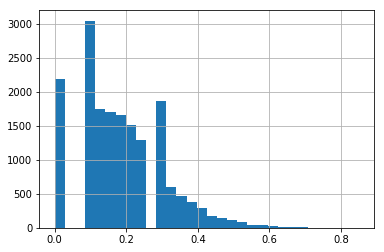

In [24]:
df.Wind.hist(bins=30)

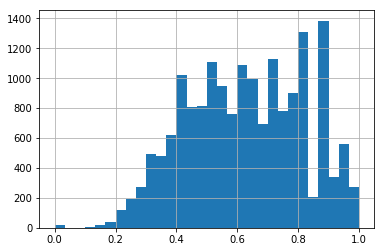

In [25]:
df.Humidity.hist(bins=30)

In [26]:
df.Holiday.value_counts()/24

0    703.291667
1     20.833333
Name: Holiday, dtype: float64

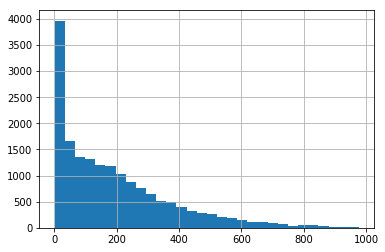

In [27]:
df.Riders.hist(bins=30)

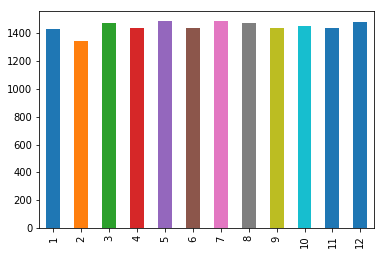

In [28]:
df.Month.value_counts().sort_index().plot.bar()

In [29]:
df.columns

Index(['Riders', 'Season', 'Month', 'Hour', 'Holiday', 'Weekday', 'Workday',
       'Weather', 'Temperature', 'Humidity', 'Wind', 'Year', 'date', 'Day'],
      dtype='object')

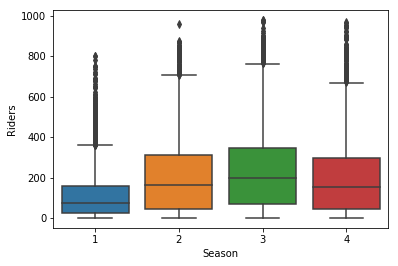

In [30]:
sns.boxplot(x='Season', y='Riders', data=df)

In [31]:
percentile = np.percentile(df['Humidity'][df.Year==2011],[0,25,50,75,100])        
IQR = percentile[3] - percentile[1]
upbound = percentile[3]+IQR*1.5
downbound = percentile[1]-IQR*1.5

In [32]:
categ_cols = ['Year', 'Season', 'Month', 'Hour', 'Holiday', 'Weekday', 'Workday', 'Weather']
for col in categ_cols:
    df['Riders'][df["Year"]==2011]

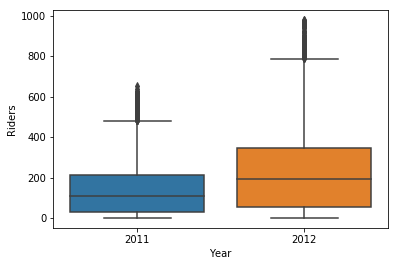

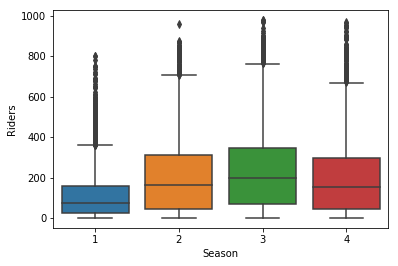

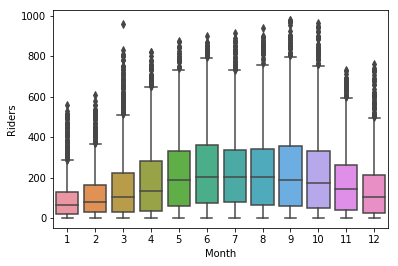

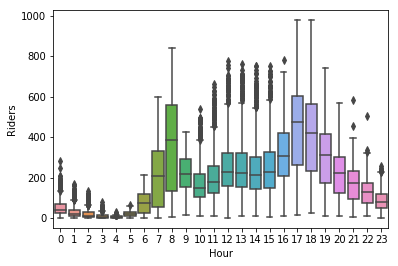

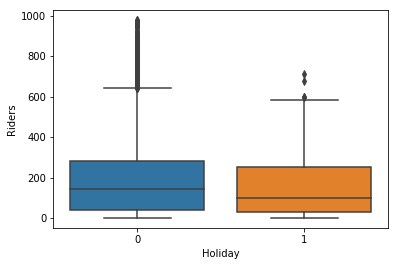

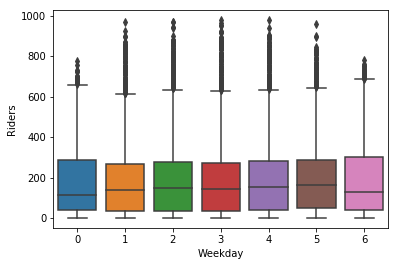

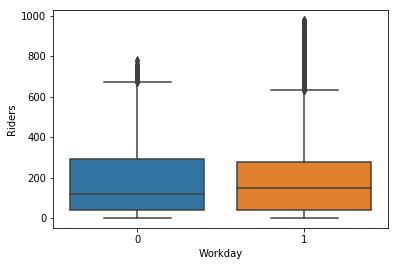

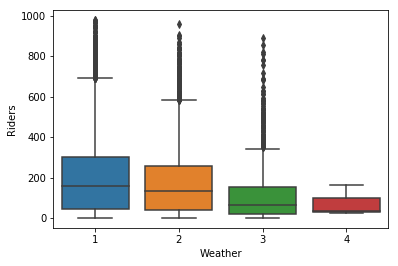

In [33]:
categ_cols = ['Year', 'Season', 'Month', 'Hour', 'Holiday', 'Weekday', 'Workday', 'Weather']
for col in categ_cols:
    sns.boxplot(x=col, y='Riders', data=df)
    plt.show()

In [34]:
df[(df.Riders > 900) & (df.Month == 3)]

,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind,Year,date,Day
Instant,,,,,,,,,,,,,,
10623,957,2,3,17,0,5,1,2,81,0.42,0.1642,2012,2012-03-23,23


# correlation coefficient

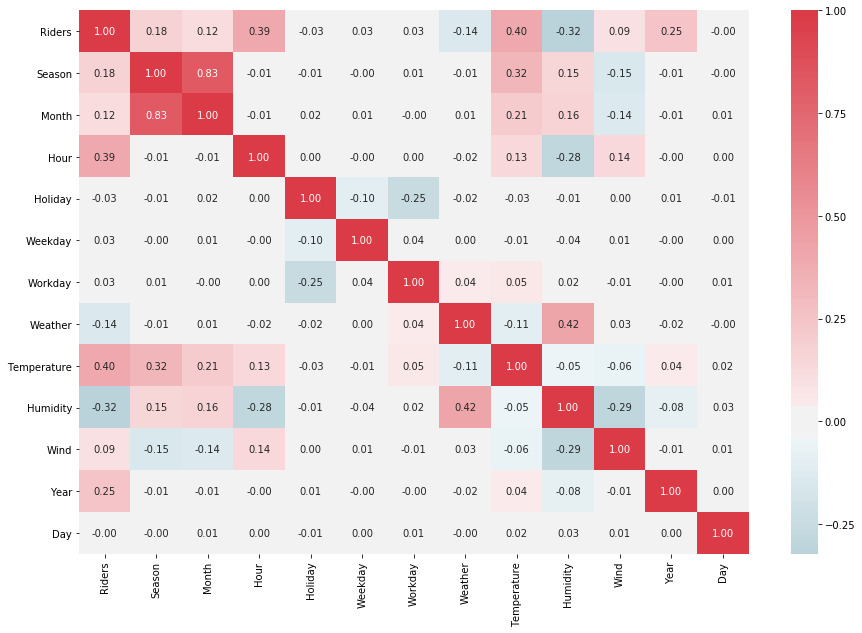

In [35]:
plt.figure(figsize=(15, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.drop('date', axis=1).corr(), cmap=colormap, center=0, annot=True, fmt=".2f")
plt.show()

In [36]:
def hour2circle(hour):
    angle = 2*np.pi / 24
    return np.sin(angle * hour), np.cos(angle * hour)

def dayofyear2circle(dayofyear):
    
    angle = 2*np.pi / 365
    return np.sin(angle * dayofyear), np.cos(angle * dayofyear)

In [37]:
df['Hour_x1'] = df.Hour.apply(lambda x: hour2circle(x)[0])
df['Hour_x2'] = df.Hour.apply(lambda x: hour2circle(x)[1])
df['DayofYear_x1'] = df.date.dt.dayofyear.apply(lambda x: dayofyear2circle(x)[0])
df['DayofYear_x2'] = df.date.dt.dayofyear.apply(lambda x: dayofyear2circle(x)[1])

In [38]:
df[(df.Month == 8) & (df.Temperature < 40)]

,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind,Year,date,Day,Hour_x1,Hour_x2,DayofYear_x1,DayofYear_x2
Instant,,,,,,,,,,,,,,,,,,
14132,88,3,8,0,0,5,1,1,32,0.57,0.1642,2012,2012-08-17,17,0.000000e+00,1.000000e+00,-0.729558,-0.683919
14133,54,3,8,1,0,5,1,1,32,0.65,0.1045,2012,2012-08-17,17,2.588190e-01,9.659258e-01,-0.729558,-0.683919
14134,19,3,8,2,0,5,1,1,32,0.61,0.1343,2012,2012-08-17,17,5.000000e-01,8.660254e-01,-0.729558,-0.683919
14135,6,3,8,3,0,5,1,1,32,0.65,0.1045,2012,2012-08-17,17,7.071068e-01,7.071068e-01,-0.729558,-0.683919
14136,9,3,8,4,0,5,1,1,32,0.73,0.1642,2012,2012-08-17,17,8.660254e-01,5.000000e-01,-0.729558,-0.683919
14137,36,3,8,5,0,5,1,1,32,0.73,0.1045,2012,2012-08-17,17,9.659258e-01,2.588190e-01,-0.729558,-0.683919
14138,157,3,8,6,0,5,1,1,32,0.78,0.1343,2012,2012-08-17,17,1.000000e+00,6.123234e-17,-0.729558,-0.683919
14139,379,3,8,7,0,5,1,1,32,0.73,0.1045,2012,2012-08-17,17,9.659258e-01,-2.588190e-01,-0.729558,-0.683919
14140,668,3,8,8,0,5,1,1,32,0.65,0.1343,2012,2012-08-17,17,8.660254e-01,-5.000000e-01,-0.729558,-0.683919


In [39]:
oneweek = df[(df.Year == 2012) & (df.Month == 8) & (14 <= df.Day) & (df.Day <= 20)]


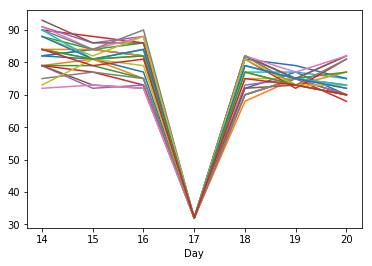

In [40]:
for h in range(24):
    
    oneweek[oneweek.Hour == h].set_index(oneweek[oneweek.Hour == h].Day).Temperature.plot()
    

In [41]:
df.loc[(df.Year == 2012) & (df.Month == 8) & (df.Day == 17), ['Temperature']] = (
    df[(df.Year == 2012) & (df.Month == 8) & (df.Day == 16)].Temperature.values +
    df[(df.Year == 2012) & (df.Month == 8) & (df.Day == 18)].Temperature.values) / 2

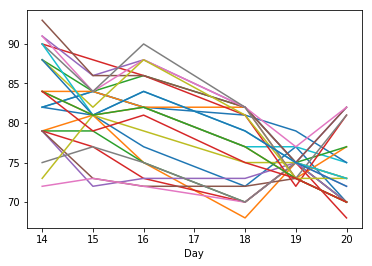

In [42]:
oneweek = df[(df.Year == 2012) & (df.Month == 8) & (14 <= df.Day) & (df.Day <= 20)]
for h in range(24):
    
    oneweek[oneweek.Hour == h].set_index(oneweek[oneweek.Hour == h].Day).Temperature.plot()

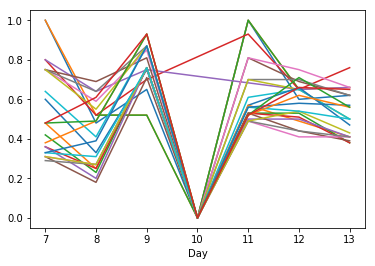

In [43]:
oneweek2 = df[(df.date >= '2011-03-07') & (df.date <= '2011-03-13')]

for h in range(24):
    
    oneweek2[oneweek2.Hour == h].set_index(oneweek2[oneweek2.Hour == h].Day).Humidity.plot()

In [44]:
df.loc[(df.Year == 2011) & (df.Month == 3) & (df.Day == 10), ['Humidity']] = (
    df[(df.Year == 2011) & (df.Month == 3) & (df.Day == 11)].Humidity.values[1:23] +
    df[(df.Year == 2011) & (df.Month == 3) & (df.Day == 9)].Humidity.values[1:23]) / 2

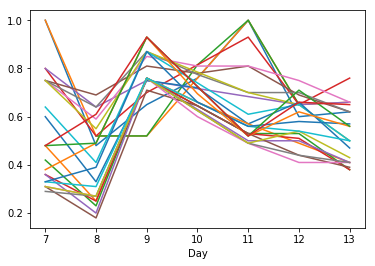

In [45]:
oneweek2 = df[(df.date >= '2011-03-07') & (df.date <= '2011-03-13')]

for h in range(24):
    
    oneweek2[oneweek2.Hour == h].set_index(oneweek2[oneweek2.Hour == h].Day).Humidity.plot()

In [46]:
temp = (df.loc[(df.Year == 2011) & (df.Month == 7), ['Wind']]<=1)&(0.8<=df.loc[(df.Year == 2011) & (df.Month == 7), ['Wind']])

In [47]:
temp.index[temp.Wind==1]

Int64Index([4316, 4317], dtype='int64', name='Instant')

In [48]:
df.loc[4313:4320,"Day"]

Instant
4313    3
4314    3
4315    3
4316    3
4317    3
4318    3
4319    3
4320    3
Name: Day, dtype: int64

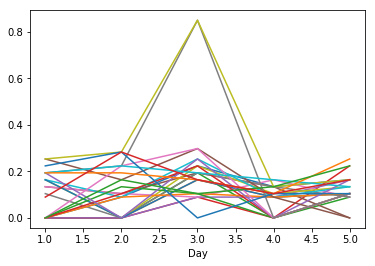

In [49]:
oneweek3 = df[(df.date >= '2011-07-01') & (df.date <= '2011-07-05')]

for h in range(24):
    
    oneweek3[oneweek3.Hour == h].set_index(oneweek3[oneweek3.Hour == h].Day).Wind.plot()

In [50]:
df.loc[(df.Year == 2011) & (df.Month == 7) & (df.Day == 3), ['Wind']] = (
    df[(df.Year == 2011) & (df.Month == 3) & (df.Day == 2)].Wind.values +
    df[(df.Year == 2011) & (df.Month == 3) & (df.Day == 4)].Wind.values) / 2

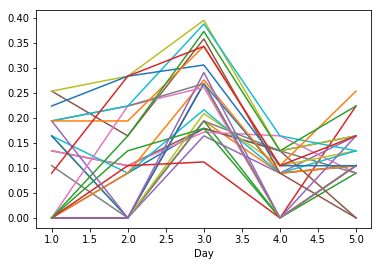

In [51]:
oneweek3 = df[(df.date >= '2011-07-01') & (df.date <= '2011-07-05')]

for h in range(24):
    
    oneweek3[oneweek3.Hour == h].set_index(oneweek3[oneweek3.Hour == h].Day).Wind.plot()

In [52]:
temp = (df.loc[(df.Year == 2011) & (df.Month == 8), ['Wind']]<=1)&(0.7<=df.loc[(df.Year == 2011) & (df.Month == 8), ['Wind']])
temp.index[temp.Wind==1]

Int64Index([5636], dtype='int64', name='Instant')

In [53]:
temp = (df.loc[(df.Year == 2012) & (df.Month == 4), ['Wind']]<=0.8)&(0.65<=df.loc[(df.Year == 2012) & (df.Month == 4), ['Wind']])
temp.index[temp.Wind==1]

Int64Index([11025], dtype='int64', name='Instant')

In [54]:
df.index[df.Wind>=0.72]

Int64Index([1018, 1126, 1260, 1262, 5636, 9957], dtype='int64', name='Instant')

In [55]:
df = df.drop([5636,11025,1018, 1126, 1260, 1262, 9957])

In [56]:
df.shape

(17372, 18)

In [57]:
df = df.drop(df.index[df.Weather==4])
df.shape

(17369, 18)

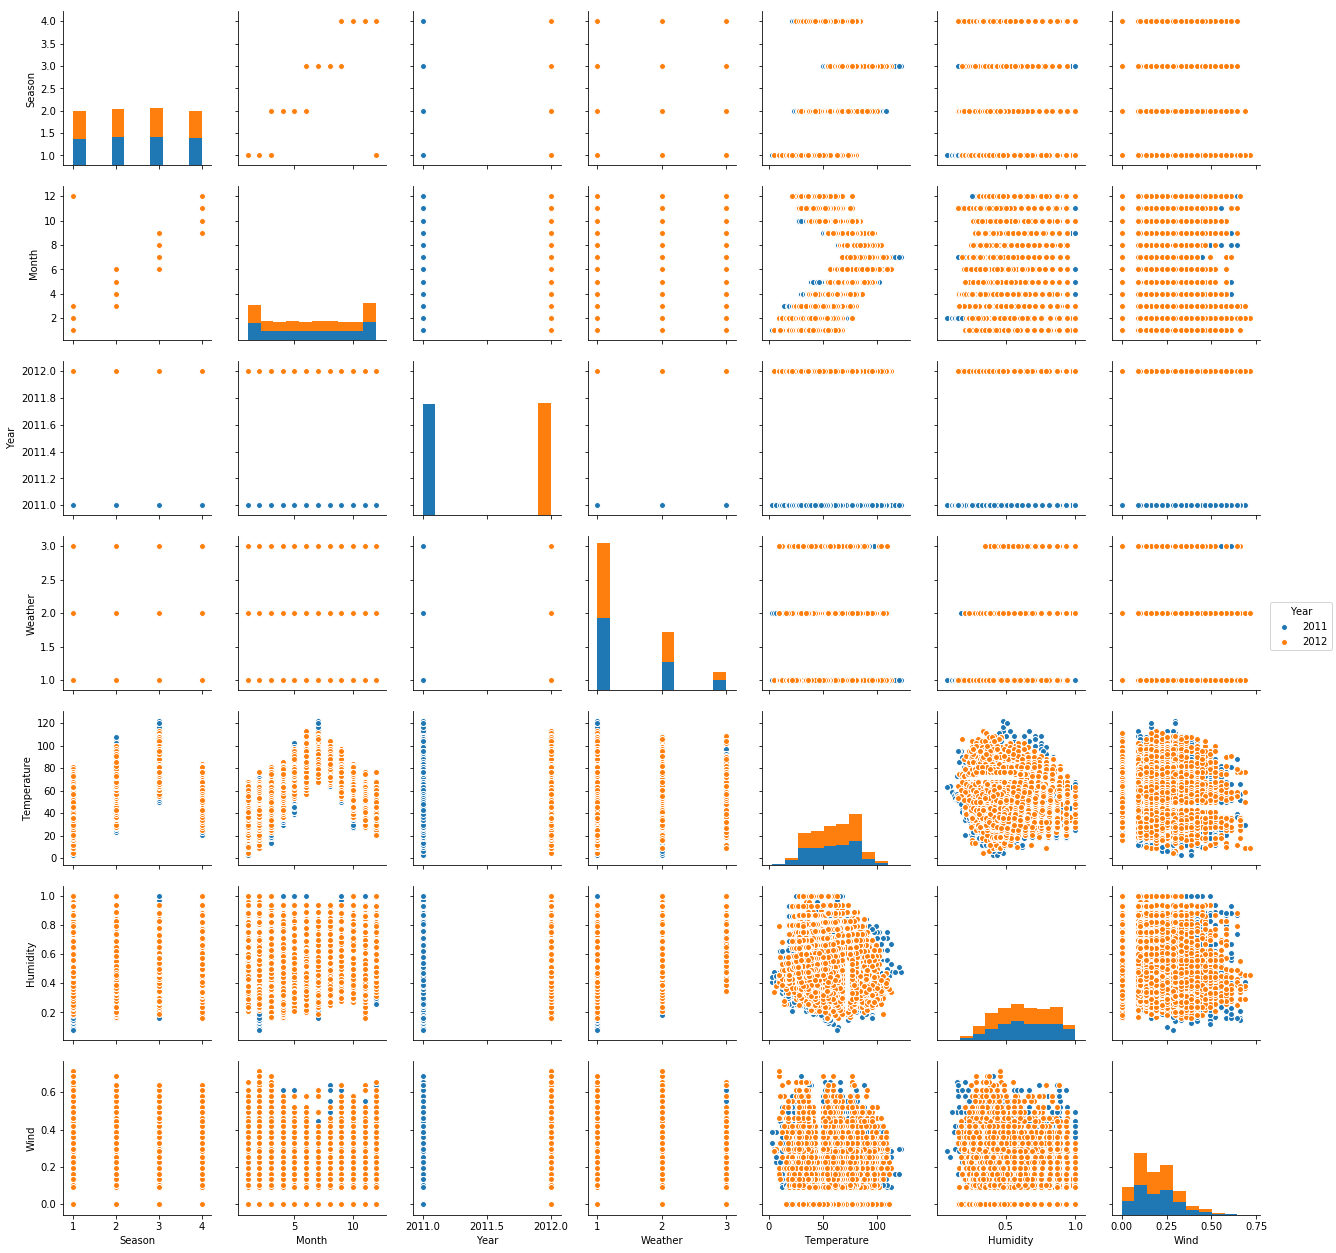

In [58]:
sns.pairplot(df[['Season', 'Month', "Year",'Weather', 'Temperature', 'Humidity','Wind']],hue="Year");

# Get Dummy
Transforming "Season","Weather","Year" into dummies.

In [59]:
df1 = df

In [60]:
df = df1

In [61]:
df.shape

(17369, 18)

In [62]:
dummy_w = pd.get_dummies(df["Weather"])

In [63]:
dummy_w = pd.DataFrame({"Clear":dummy_w[1],"Cloudy":dummy_w[2],"Raining":dummy_w[3]})

In [64]:
df = pd.concat([df,dummy_w],axis=1)

In [65]:
dummy_y = pd.get_dummies(df["Year"])

In [66]:
dummy_y.columns=["a","b"]

In [67]:
dummy_y = pd.DataFrame({"Year_b":dummy_y["a"]})

In [68]:
df = pd.concat([df,dummy_y],axis=1)

In [69]:
dummy_s = pd.get_dummies(df["Season"])

In [70]:
dummy_s = pd.DataFrame({"Winter":dummy_s[1],"Spring":dummy_s[2],"Summer":dummy_s[3],"Fall":dummy_s[4]})

In [71]:
df = pd.concat([df,dummy_s],axis=1)

In [72]:
df.shape

(17369, 26)

In [73]:
df.columns

Index(['Riders', 'Season', 'Month', 'Hour', 'Holiday', 'Weekday', 'Workday',
       'Weather', 'Temperature', 'Humidity', 'Wind', 'Year', 'date', 'Day',
       'Hour_x1', 'Hour_x2', 'DayofYear_x1', 'DayofYear_x2', 'Clear', 'Cloudy',
       'Raining', 'Year_b', 'Winter', 'Spring', 'Summer', 'Fall'],
      dtype='object')

# Drop
Here we get all of variable. For regression or classification, our targets are different. So we may drop some variables according to model and our demand. 

In [74]:
df_r = df.drop(["Season","Month","Holiday","Weekday","Weather","Year","Clear",'DayofYear_x1', 'DayofYear_x2',"Hour","Summer",'date','Wind', 'Day','Spring','Workday','Humidity','Winter'],axis=1)

In [75]:
df_r.columns

Index(['Riders', 'Temperature', 'Hour_x1', 'Hour_x2', 'Cloudy', 'Raining',
       'Year_b', 'Fall'],
      dtype='object')

In [76]:
df_t = df.drop(["Season","Holiday","Weekday","Weather","Year","Clear",'DayofYear_x1', 'DayofYear_x2',"Hour","Summer",'Wind','Spring','Workday','Humidity',"Winter"],axis=1)

In [77]:
df_t.columns

Index(['Riders', 'Month', 'Temperature', 'date', 'Day', 'Hour_x1', 'Hour_x2',
       'Cloudy', 'Raining', 'Year_b', 'Fall'],
      dtype='object')

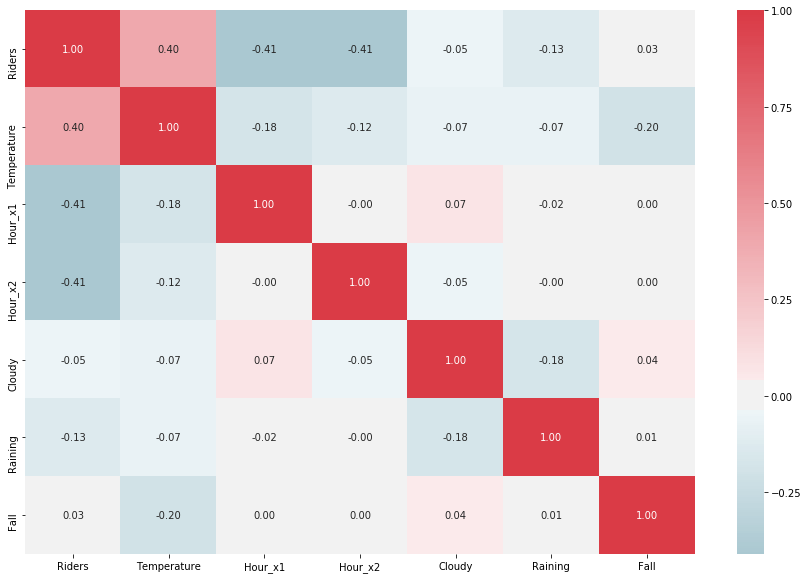

In [78]:
plt.figure(figsize=(15, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_r.drop(["Year_b"],axis=1).corr(), cmap=colormap, center=0, annot=True, fmt=".2f")
plt.show()

# PCA
Not very well...

In [79]:
df_2011 = df[df.Year_b==1].drop(["date"],axis=1)

In [80]:
names = df_2011.drop(["Riders"],axis=1).columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_2011.drop(["Riders"],axis=1))
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [81]:
pca = PCA(n_components=0.9).fit(scaled_df)

In [82]:
df_2011p = pd.DataFrame(pca.transform(scaled_df))

In [83]:
df_2011p.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.349966,0.198231,-1.870682,-2.401295,0.886877,-0.802136,1.167499,-1.049467,2.351129,0.676033,-0.831879
1,2.366361,0.225195,-1.886262,-2.512527,0.916751,-0.767288,1.098554,-0.953773,2.343656,0.660227,-0.873274
2,2.366286,0.251006,-1.874191,-2.597221,0.952721,-0.719411,1.010119,-0.823201,2.325685,0.629299,-0.965962
3,2.381227,0.174365,-1.890233,-2.562507,1.019724,-0.612460,0.850245,-0.617022,2.307001,0.586498,-1.109737
4,2.384243,0.180299,-1.878943,-2.544842,1.060820,-0.537948,0.727579,-0.437966,2.278121,0.534543,-1.283754


In [84]:
y = df_2011.Riders.reset_index().drop(["Instant"],axis=1)

In [85]:
model_p = sm.OLS(y,df_2011p).fit()
model_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Riders   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     232.9
Date:                Wed, 14 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:00:49   Log-Likelihood:                -56753.
No. Observations:                8639   AIC:                         1.135e+05
Df Residuals:                    8628   BIC:                         1.136e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0            -17.0481      0.913    -18.672      0.000     -18.838     -15.258
1            -24.6017      1.043    -23.583      0.000     -26.647     -22.557
2              9.7014      1.131      8.574      0.000       7.483      11.919
3             44.8117      1.320     33.952      0.000      42.224      47.399
4             -4.9610      1.533     -3.235      0.001      -7.967      -1.955
5             17.8537      1.607     11.111      0.000      14.704      21.003
6            -14.8706      1.667     -8.920      0.000     -18.138     -11.603
7              9.3856      1.703      5.512      0.000       6.048      12.723
8             -1.5383      1.851     -0.831      0.406      -5.167       2.090
9             -5.7581      1.873     -3.075      0.002      -9.429      -2.087
10           -28.0213      2.105    -13.309      0.000     -32.148     -23.894
==============================================================================
Omnibus:                     1732.447   Durbin-Watson:                   0.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3304.336
Skew:                           1.231   Prob(JB):                         0.00
Kurtosis:                       4.766   Cond. No.                         2.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
y_pred_p = model_p.predict(df_2011p)

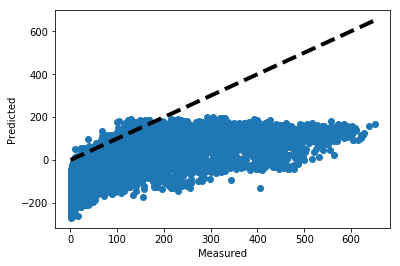

In [87]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred_p)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Connection between 2011 and 2012
There is a connection between riders in 2011 and 2012. We can use a linear regression to show.

In [88]:
df_2011 = df_t[df_t.Year_b==1].drop(['Year_b'],axis=1)
df_2012 = df_t[df_t.Year_b==0].drop(['Year_b'],axis=1)

Text(0.5,1,'2011 vs 2012')

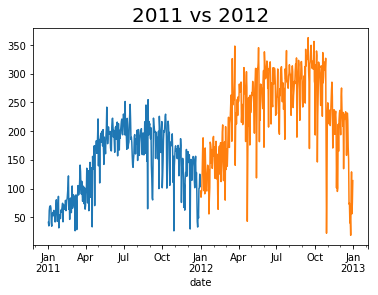

In [89]:
df_2011.Riders.groupby(df.date).mean().plot();
df_2012.Riders.groupby(df.date).mean().plot();
plt.title('2011 vs 2012',fontsize=20)

In [90]:
df_2011 = df_2011.drop(['date'],axis=1)
df_2012 = df_2012.drop(['date'],axis=1)


In [91]:
df_2011=pd.DataFrame({"Month":df_2011["Month"],"Day":df_2011["Day"],"Riders1":df_2011["Riders"],"Hour1":df_2011["Hour_x1"],"Hour2":df_2011["Hour_x2"]})
df_2012=pd.DataFrame({"Month":df_2012["Month"],"Day":df_2012["Day"],"Riders2":df_2012["Riders"],"Hour1":df_2012["Hour_x1"],"Hour2":df_2012["Hour_x2"]})
result = pd.merge(df_2011, df_2012, how='inner', on=['Month', 'Day','Hour1','Hour2'])

In [92]:
model = sm.OLS(result.Riders2,result.Riders1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Riders2   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                 2.241e+04
Date:                Wed, 14 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:00:53   Log-Likelihood:                -56095.
No. Observations:                8586   AIC:                         1.122e+05
Df Residuals:                    8585   BIC:                         1.122e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Riders1        1.3650      0.009    149.709      0.000       1.347       1.383
==============================================================================
Omnibus:                      565.490   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1745.812
Skew:                           0.320   Prob(JB):                         0.00
Kurtosis:                       5.114   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2011 Model
Set models seperately, Using linear model and poly model

In [201]:
df_2011 = df_r[df_r.Year_b==1].drop(["Year_b"],axis=1)

In [202]:
X_train_11,X_test_11, y_train_11, y_test_11 = train_test_split(df_2011.drop(["Riders"],axis=1),df_2011.Riders,test_size=0.4, random_state=1)

In [203]:
X_train_11 = X_train_11.sort_index()
y_train_11 = y_train_11.sort_index()
X_test_11 = X_test_11.sort_index()
y_test_11 = y_test_11.sort_index()

In [204]:
model_lr11 = sm.OLS(y_train_11,X_train_11).fit()
model_lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Riders   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     2742.
Date:                Wed, 14 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:25:53   Log-Likelihood:                -31012.
No. Observations:                5183   AIC:                         6.204e+04
Df Residuals:                    5177   BIC:                         6.208e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature     2.4061      0.027     89.373      0.000       2.353       2.459
Hour_x1       -69.0294      1.900    -36.332      0.000     -72.754     -65.305
Hour_x2       -69.6252      1.888    -36.880      0.000     -73.326     -65.924
Cloudy        -11.8212      3.011     -3.926      0.000     -17.724      -5.918
Raining       -56.6169      4.729    -11.973      0.000     -65.888     -47.346
Fall           34.0745      2.962     11.504      0.000      28.268      39.881
==============================================================================
Omnibus:                      938.503   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1766.481
Skew:                           1.118   Prob(JB):                         0.00
Kurtosis:                       4.783   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

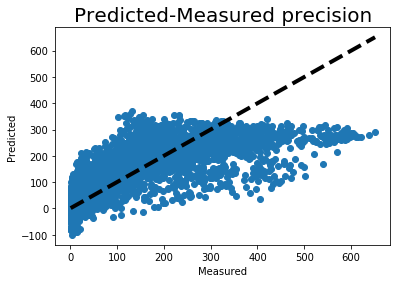

In [205]:
y_pred_11 = model_lr11.predict(X_test_11)
fig, ax = plt.subplots()
ax.scatter(y_test_11, y_pred_11)
ax.plot([y_test_11.min(), y_test_11.max()], [y_test_11.min(), y_test_11.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Predicted-Measured precision',fontsize=20)
plt.show()

In [206]:
def poly_reg(X_train,X_test,y_train,y_test,poly_first,poly_end):
    a = np.empty([poly_end-poly_first+1,len(y_test)])
    for i in range(poly_first,poly_end+1):
        pol = PolynomialFeatures(degree = i)
        x_train_pol11 = pol.fit_transform(X_train)
        x_test_pol11 = pol.fit_transform(X_test)
        lr_pol = LinearRegression()
        model = lr_pol.fit(x_train_pol11, y_train)   
        y_pred_11_p = model.predict(x_test_pol11)
        a[i-2]=y_pred_11_p
    return a

In [207]:
y_pred_o = poly_reg(X_train_11,X_test_11,y_train_11,y_test_11,2,4)

In [208]:
y_pred_o_lr = np.insert(y_pred_o,0,np.array(y_pred_11),0)

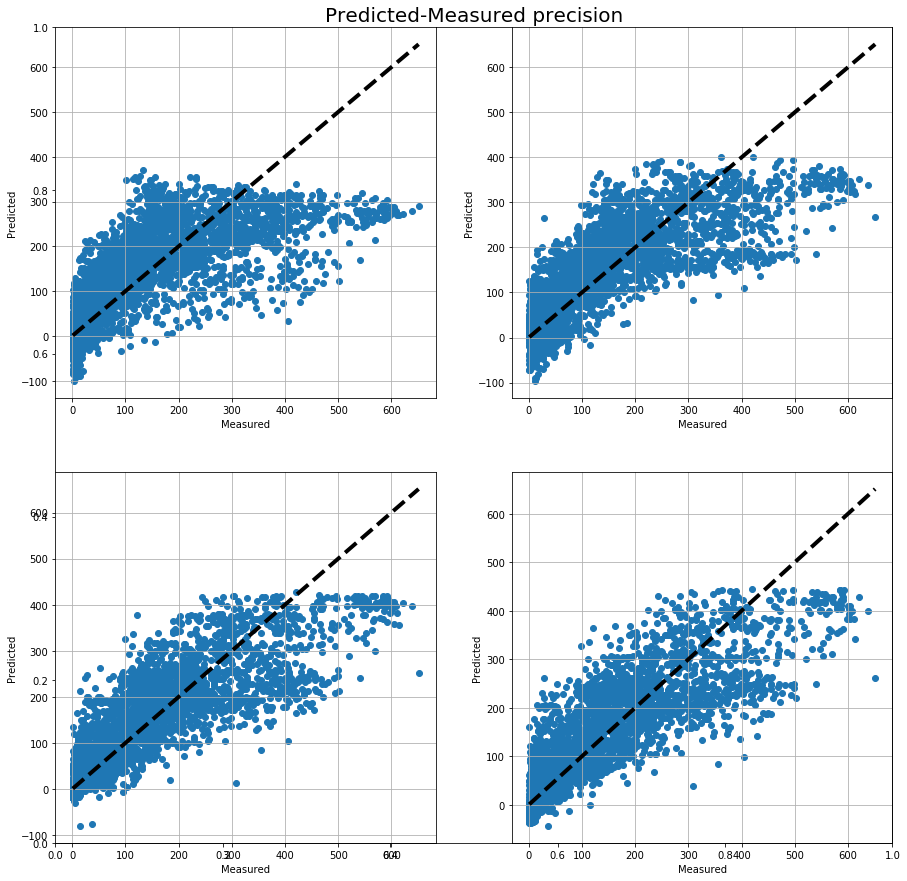

In [209]:
fig=plt.figure(figsize=(15, 15))
plt.title('Predicted-Measured precision',fontsize=20)
for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    ax.scatter(y_test_11, y_pred_o_lr[i])
    ax.plot([y_test_11.min(), y_test_11.max()], [y_test_11.min(), y_test_11.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.grid()
plt.show()

In [210]:
da = pd.DataFrame(y_pred_o.T)

In [211]:
da.head()

,0,1,2
0,23.201048,-15.731243,-23.455706
1,61.348965,-3.052316,0.659179
2,117.870886,80.991483,109.521164
3,151.576748,99.978833,88.064136
4,105.842236,67.350532,53.832008


In [250]:
def modify(y_test,da,poly_end,m):
    da = da.set_index(y_test.index)
    for i in range(poly_end-1):
        da[i][(-40*m<=da[i]-y_test)&(y_test<=300*m)&(da[i]-y_test<=0)]=da[i]+50*m
        da[i][(y_test<=300*m)&(da[i]-y_test>=40)]=da[i]-100*m
        da[i][(y_test<=300*m)&(da[i]-y_test<=40)&(da[i]-y_test>=0)]=da[i]-20*m
        da[i][(-100*m<=da[i]-y_test)&(da[i]-y_test<=-40*m)]=da[i]+50*m
        da[i][(da[i]-y_test<=-100*m)]=da[i]+80*m
        da[i][(100*m<=da[i]-y_test)]=da[i]-80*m
        da[i][(300*m<=y_test)&(y_test<400*m)&(da[i]-y_test<=50)&(da[i]-y_test>=0)]=da[i]-30*m
        da[i][(300*m<=y_test)&(y_test<400*m)&(da[i]-y_test<=0)]=da[i]+40*m
        da[i][(400*m<=y_test)]=da[i]+100*m
    return da

In [251]:
da = modify(y_test_11,pd.DataFrame(y_pred_o.T),4,1)

In [252]:
y_pred_p=np.array(da).T

In [253]:
y_pred_p

array([[  3.20104833, -38.65103469,  -2.12911421, ..., 148.5871357 ,
        112.87568336,   8.83778059],
       [ 14.26875683,  -3.05231585, -19.00851702, ..., 149.16053773,
         67.31577389,  53.10100681],
       [  6.54429432,   0.65917949, -10.4788361 , ..., 155.94277004,
         57.46320563,  34.57068994]])

In [254]:
y_pred_p_lr = np.insert(y_pred_p,0,np.array(y_pred_11),0)

In [255]:
def accuracy(predicted,measured,cutoff,num):
    acc=[]
    for i in range(0,num):
        diff = predicted[i]-measured
        a = (diff<=cutoff)&(diff>=-cutoff)
        acc.append(len(a[a==True])/len(measured))
    return acc

In [256]:
accuracy(y_pred_p_lr,y_test_11,20,4)

[0.1935763888888889,
 0.7699652777777778,
 0.8006365740740741,
 0.8012152777777778]

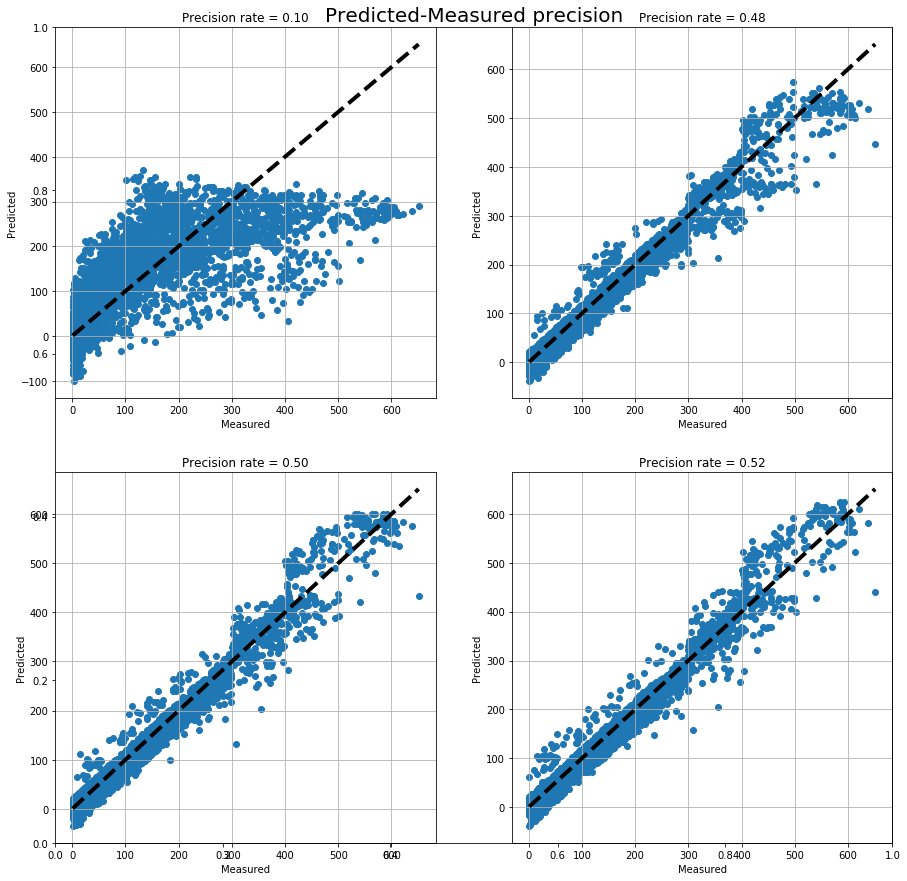

In [257]:
fig=plt.figure(figsize=(15, 15))
plt.title('Predicted-Measured precision',fontsize=20)

for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    ax.scatter(y_test_11, y_pred_p_lr[i])
    ax.plot([y_test_11.min(), y_test_11.max()], [y_test_11.min(), y_test_11.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.grid()
    plt.title('Precision rate = {0:0.2f}'.format(accuracy(y_pred_p_lr,y_test_11,10,4)[i]))
plt.show()

# 2012 Model
Set models seperately, Using linear model and poly model

In [258]:
df_2012 = df_r[df_r.Year_b==0].drop(["Year_b"],axis=1)

In [259]:
X_train_12,X_test_12, y_train_12, y_test_12 = train_test_split(df_2012.drop(["Riders"],axis=1),df_2012.Riders,test_size=0.4, random_state=1)

In [260]:
X_train_12 = X_train_12.sort_index()
y_train_12 = y_train_12.sort_index()
X_test_12 = X_test_12.sort_index()
y_test_12 = y_test_12.sort_index()

In [261]:
model_lr12 = sm.OLS(y_train_12,X_train_12).fit()
model_lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Riders   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     2861.
Date:                Wed, 14 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:29:48   Log-Likelihood:                -33750.
No. Observations:                5238   AIC:                         6.751e+04
Df Residuals:                    5232   BIC:                         6.755e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature     3.7243      0.041     91.308      0.000       3.644       3.804
Hour_x1      -108.4719      2.987    -36.319      0.000    -114.327    -102.617
Hour_x2      -119.7176      2.984    -40.126      0.000    -125.567    -113.869
Cloudy        -13.0102      4.757     -2.735      0.006     -22.337      -3.684
Raining       -86.1140      8.153    -10.562      0.000    -102.098     -70.130
Fall           61.4922      4.745     12.960      0.000      52.191      70.794
==============================================================================
Omnibus:                     1019.394   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1926.892
Skew:                           1.196   Prob(JB):                         0.00
Kurtosis:                       4.763   Cond. No.                         248.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

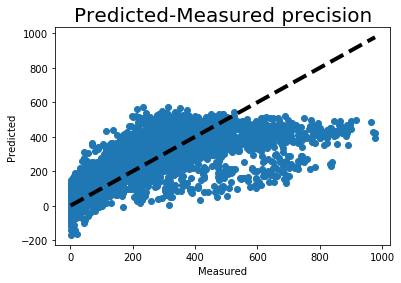

In [262]:
y_pred_12 = model_lr12.predict(X_test_12)
fig, ax = plt.subplots()
ax.scatter(y_test_12, y_pred_12)
ax.plot([y_test_12.min(), y_test_12.max()], [y_test_12.min(), y_test_12.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Predicted-Measured precision',fontsize=20)
plt.show()

In [263]:
y_pred_o = poly_reg(X_train_12,X_test_12,y_train_12,y_test_12,2,4)

In [264]:
y_pred_o_lr = np.insert(y_pred_o,0,np.array(y_pred_12),0)

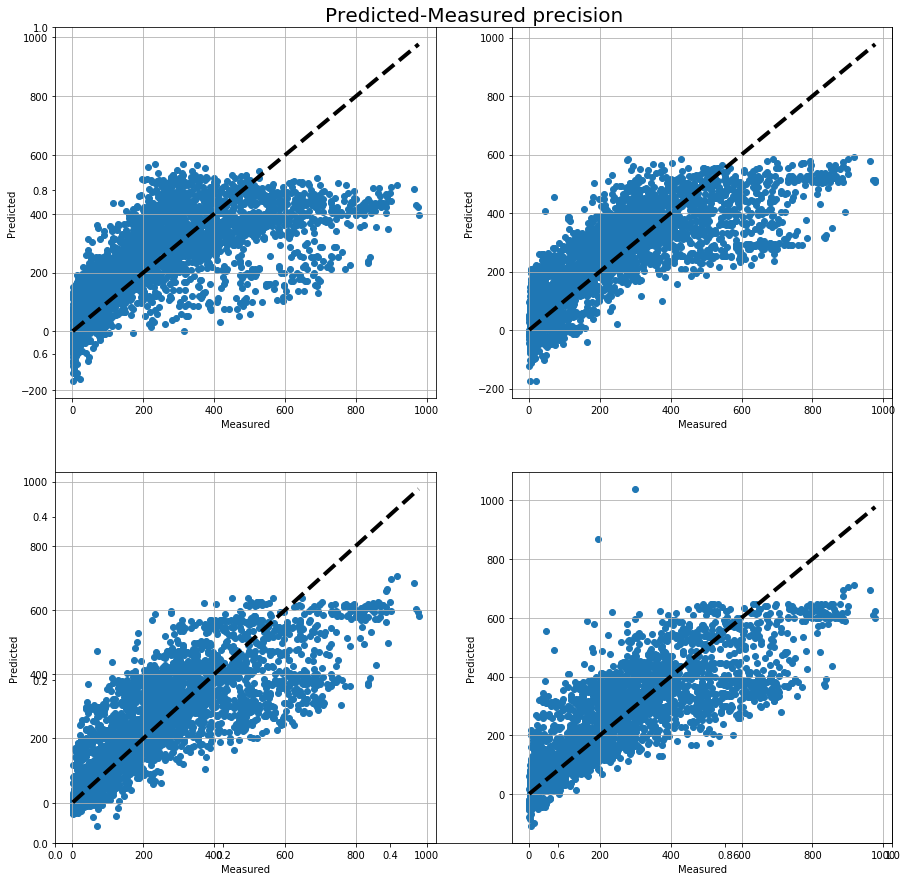

In [265]:
fig=plt.figure(figsize=(15, 15))
plt.title('Predicted-Measured precision',fontsize=20)
for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    ax.scatter(y_test_12, y_pred_o_lr[i])
    ax.plot([y_test_12.min(), y_test_12.max()], [y_test_12.min(), y_test_12.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.grid()
plt.show()

In [266]:
da = modify(y_test_12,pd.DataFrame(y_pred_o.T),4,1.365)

In [267]:
y_pred_p=np.array(da).T

In [268]:
y_pred_p_lr = np.insert(y_pred_p,0,np.array(y_pred_12),0)

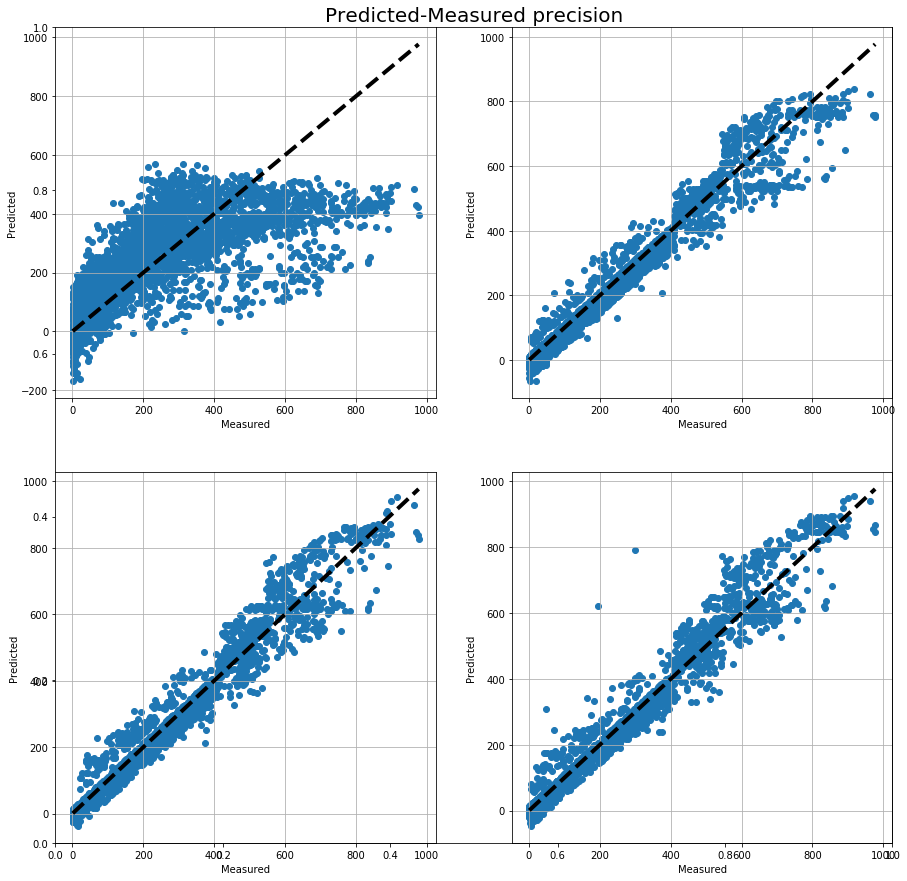

In [269]:
fig=plt.figure(figsize=(15, 15))
plt.title('Predicted-Measured precision',fontsize=20)
for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    ax.scatter(y_test_12, y_pred_p_lr[i])
    ax.plot([y_test_12.min(), y_test_12.max()], [y_test_12.min(), y_test_12.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.grid()
plt.show()

# Using model 2011 to pred 2012
Because there is a linear connection between riders in 2011 and 2012, it is feasible to predict 2012.

In [274]:
y_pred = model_lr11.predict(df_2012.drop(['Riders'],axis=1))

In [275]:
y_pred_o = poly_reg(df_2011.drop(['Riders'],axis=1),df_2012.drop(['Riders'],axis=1),df_2011.Riders*1.365,df_2012.Riders,2,4)

In [276]:
da = modify(df_2012.Riders,pd.DataFrame(y_pred_o.T),4,1.365)

In [277]:
y_pred_p=np.array(da).T

In [278]:
y_pred_p

array([[22.98804229, 52.90840007, 49.19037153, ..., 71.46518918,
        64.71296711, 33.89529089],
       [26.61056731, 97.9401806 , 74.66495232, ..., 95.01215594,
        42.08537251, 36.32334163],
       [38.96754549, 92.11332557, 83.29293883, ..., 88.35401081,
        64.54725022, 29.15725134]])

In [279]:
y_pred_p_lr = np.insert(y_pred_p,0,np.array(y_pred),0)

In [281]:
accuracy(y_pred_p_lr,df_2012.Riders,20,4)

[0.18739977090492554,
 0.5893470790378007,
 0.5906071019473081,
 0.6051546391752577]

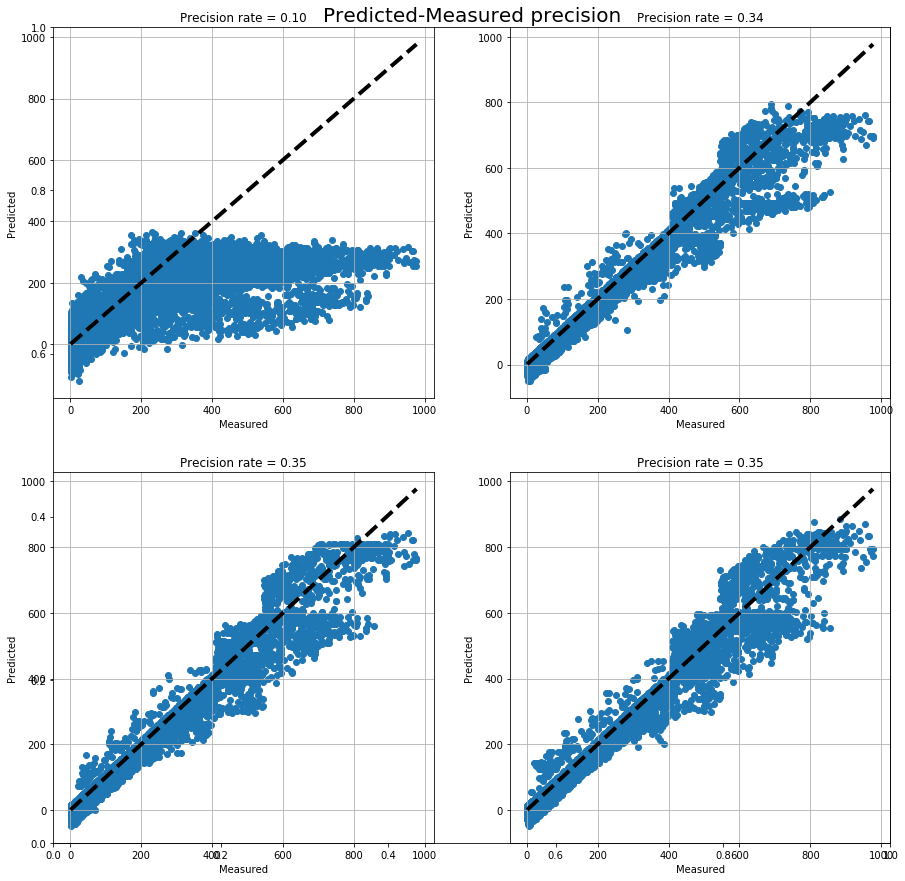

In [282]:
fig=plt.figure(figsize=(15, 15))
plt.title('Predicted-Measured precision',fontsize=20)
for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    ax.scatter(df_2012.Riders, y_pred_p_lr[i])
    ax.plot([df_2012.Riders.min(), df_2012.Riders.max()], [df_2012.Riders.min(), df_2012.Riders.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.grid()
    plt.title('Precision rate = {0:0.2f}'.format(accuracy(y_pred_p_lr,df_2012.Riders,10,4)[i]))
plt.show()